In [195]:
# Importamos las librerías necesarias:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [181]:
# 1) Creamos un dataframe
df = pd.read_csv(r"C:\Users\celin\OneDrive\titanic_processed.csv")

print("Primeras filas del DataFrame:")
#print(df.head())

print(df)


Primeras filas del DataFrame:
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0           0       3    1  22.0      0      0   7.8958           0   
1           1       3    0  26.0      0      0   7.9250           0   
2           0       3    1  27.0      0      0   7.8958           0   
3           0       2    1  32.0      2      0  73.5000           0   
4           0       3    1  65.0      0      0   7.7500           0   
..        ...     ...  ...   ...    ...    ...      ...         ...   
707         0       3    1  22.0      0      0   8.0500           0   
708         1       1    1  35.0      0      0  26.2875           0   
709         0       3    1  21.0      0      0   8.4333           0   
710         0       3    1  25.0      0      0   7.2250           1   
711         0       3    1  22.0      0      0   9.0000           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           1  
2             0           1

2)Utilice el comando train_test_split para separar los datos en conjuntos de entrenamiento y prueba. La fracción de datos de prueba debe estar entre 20% y 30%. 


In [182]:
X = df.drop('Survived', axis=1)  # Variables independientes
y = df['Survived']  # Variable dependiente (supervivencia)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [183]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3) Determinar un modelo de clasificación de regresión logístic

# Ajustar el modelo de regresión logística
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=300)

In [184]:
# 4) Evaluar el desempeño del modelo de regresión logística
y_pred_log = log_model.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nModelo de Regresión Logística:")
print(f"Precisión (Accuracy): {accuracy_log:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_log)


Modelo de Regresión Logística:
Precisión (Accuracy): 0.74
Matriz de Confusión:
[[83 20]
 [27 48]]


In [185]:
# 5) Determinar un modelo de clasificación del tipo árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()


Modelo de Árbol de Decisión:
Precisión (Accuracy): 0.77
Matriz de Confusión:
[[83 20]
 [21 54]]


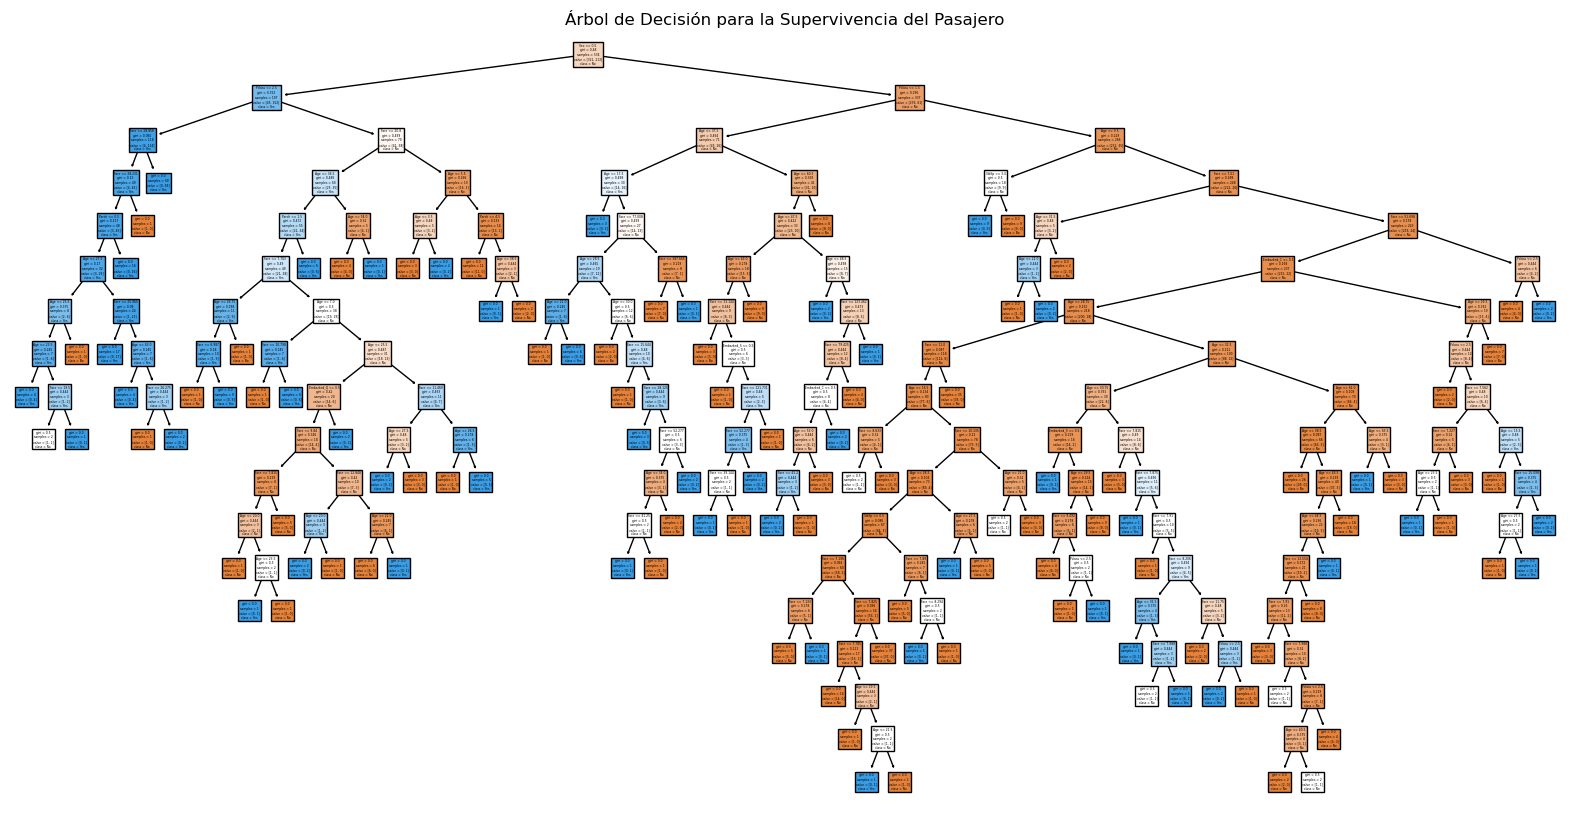

In [186]:
# 6) Evaluar el desempeño del modelo de árbol de decisión
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("\nModelo de Árbol de Decisión:")
print(f"Precisión (Accuracy): {accuracy_tree:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_tree)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title("Árbol de Decisión para la Supervivencia del Pasajero")
plt.show()

COMO EL ACCURACY ES MENOR AL 80%, ENTONCES VOY A BUSCAR LAS VARIABLES QUE MENOS IMPACTO TENGAN EN MIS PREDICCIONES PERO QUE PUEDAN MODIFICAR MIS RESULTADOS SI LAS INCLUYO.


In [187]:
# 1) Creamos un dataframe
df = pd.read_csv(r"C:\Users\celin\OneDrive\titanic_processed.csv")

print("Primeras filas del DataFrame:")
#print(df.head())
# Contar la cantidad de 0s y 1s en la columna 'Survived'
survived_counts = df['Survived'].value_counts()

# Mostrar los resultados
print(survived_counts)

print(df)


Primeras filas del DataFrame:
Survived
0    424
1    288
Name: count, dtype: int64
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0           0       3    1  22.0      0      0   7.8958           0   
1           1       3    0  26.0      0      0   7.9250           0   
2           0       3    1  27.0      0      0   7.8958           0   
3           0       2    1  32.0      2      0  73.5000           0   
4           0       3    1  65.0      0      0   7.7500           0   
..        ...     ...  ...   ...    ...    ...      ...         ...   
707         0       3    1  22.0      0      0   8.0500           0   
708         1       1    1  35.0      0      0  26.2875           0   
709         0       3    1  21.0      0      0   8.4333           0   
710         0       3    1  25.0      0      0   7.2250           1   
711         0       3    1  22.0      0      0   9.0000           0   

     Embarked_Q  Embarked_S  
0             0           1  
1   

2)Utilice el comando train_test_split para separar los datos en conjuntos de entrenamiento y prueba. La fracción de datos de prueba debe estar entre 20% y 30%. 


In [188]:

X = df.drop('Survived', axis=1)  # Variables independientes
y = df['Survived']  # Variable dependiente (supervivencia)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [189]:

# 3) Determinar un modelo de clasificación de regresión logístic

# Ajustar el modelo de regresión logística
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train_scaled, y_train)

# Obtener los coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,  # nombres de las variables
    'Coeficiente': log_model.coef_[0]
})

print(coeficientes)



# 4) Evaluar el desempeño del modelo de regresión logística
y_pred_log = log_model.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nModelo de Regresión Logística:")
print(f"Precisión (Accuracy): {accuracy_log:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_log)

     Variable  Coeficiente
0      Pclass    -1.017732
1         Sex    -1.362318
2         Age    -0.495378
3       SibSp    -0.360271
4       Parch    -0.018996
5        Fare     0.067846
6  Embarked_C     0.077309
7  Embarked_Q    -0.010673
8  Embarked_S    -0.066012

Modelo de Regresión Logística:
Precisión (Accuracy): 0.74
Matriz de Confusión:
[[83 20]
 [27 48]]


Parch (-0.018996): El número de padres o hijos a bordo tiene un coeficiente muy pequeño, lo que sugiere que tiene un impacto mínimo en la predicción de la supervivencia.
Embarked_Q (-0.010673): Cherbourg (C) parece estar asociado a una mayor probabilidad de supervivencia en comparación con Southampton (S), mientras que embarcar en Queenstown (Q) tiene un impacto muy pequeño.

In [196]:
#Vuelvo a probar eliminando esas variables para verificar si hay alguna modificación en el Accuracy.
df = pd.read_csv(r"C:\Users\celin\OneDrive\titanic_processed.csv")
X = df.drop(['Survived', 'SibSp', 'Embarked_Q', 'Embarked_S'], axis=1)  # Variables independientes y variables con bajos coeficientes
y = df['Survived']  # Variable dependiente (supervivencia)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determinar un modelo de clasificación de regresión logístic

# Ajustar el modelo de regresión logística (utilicé class_weight para balancear las muestras de supervivientes y no supervivientes)
log_model = LogisticRegression(max_iter=300, class_weight='balanced', C=0.5, solver='liblinear')

log_model.fit(X_train_scaled, y_train)
# Obtener los coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,  # nombres de las variables
    'Coeficiente': log_model.coef_[0]
})

print(coeficientes)

# Evaluar el desempeño del modelo de regresión logística
y_pred_log = log_model.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("\nModelo de Regresión Logística:")
print(f"Precisión (Accuracy): {accuracy_log:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_log)

     Variable  Coeficiente
0      Pclass    -0.896563
1         Sex    -1.339591
2         Age    -0.368316
3       Parch    -0.096353
4        Fare     0.057421
5  Embarked_C     0.191850

Modelo de Regresión Logística:
Precisión (Accuracy): 0.74
Matriz de Confusión:
[[96 31]
 [25 62]]


Modificando las variables con bajos coeficientes del modelo, así como balanceando las clases, no hemos logrado llegar al 80% del accuracy. Un 74% de precisión indica que el modelo tiene un desempeño razonable, pero no suficiente para los objetivos planteados. De tal manera, debemos replantearnos las mejoras y ajustes para lograr ese objetivo, teniendo en cuenta si hay que lograr una mejor selección de las variables, que realmente estén correlacionadas con Supervivencia, evaluar de ajustar los hiperparámentros nuevamente, comprender si las clases están desbalanceadas, ya que el modelo podría estar sesgado hacia la clase mayoritaria. La matriz de confusión nos indica cuántos datos fueron acertados y cuáles falsos supervivientes/ no supervivientes.

In [199]:
# Determinar un modelo de clasificación del tipo árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)




DecisionTreeClassifier()


Modelo de Árbol de Decisión:
Precisión (Accuracy): 0.80
Matriz de Confusión:
[[108  19]
 [ 24  63]]


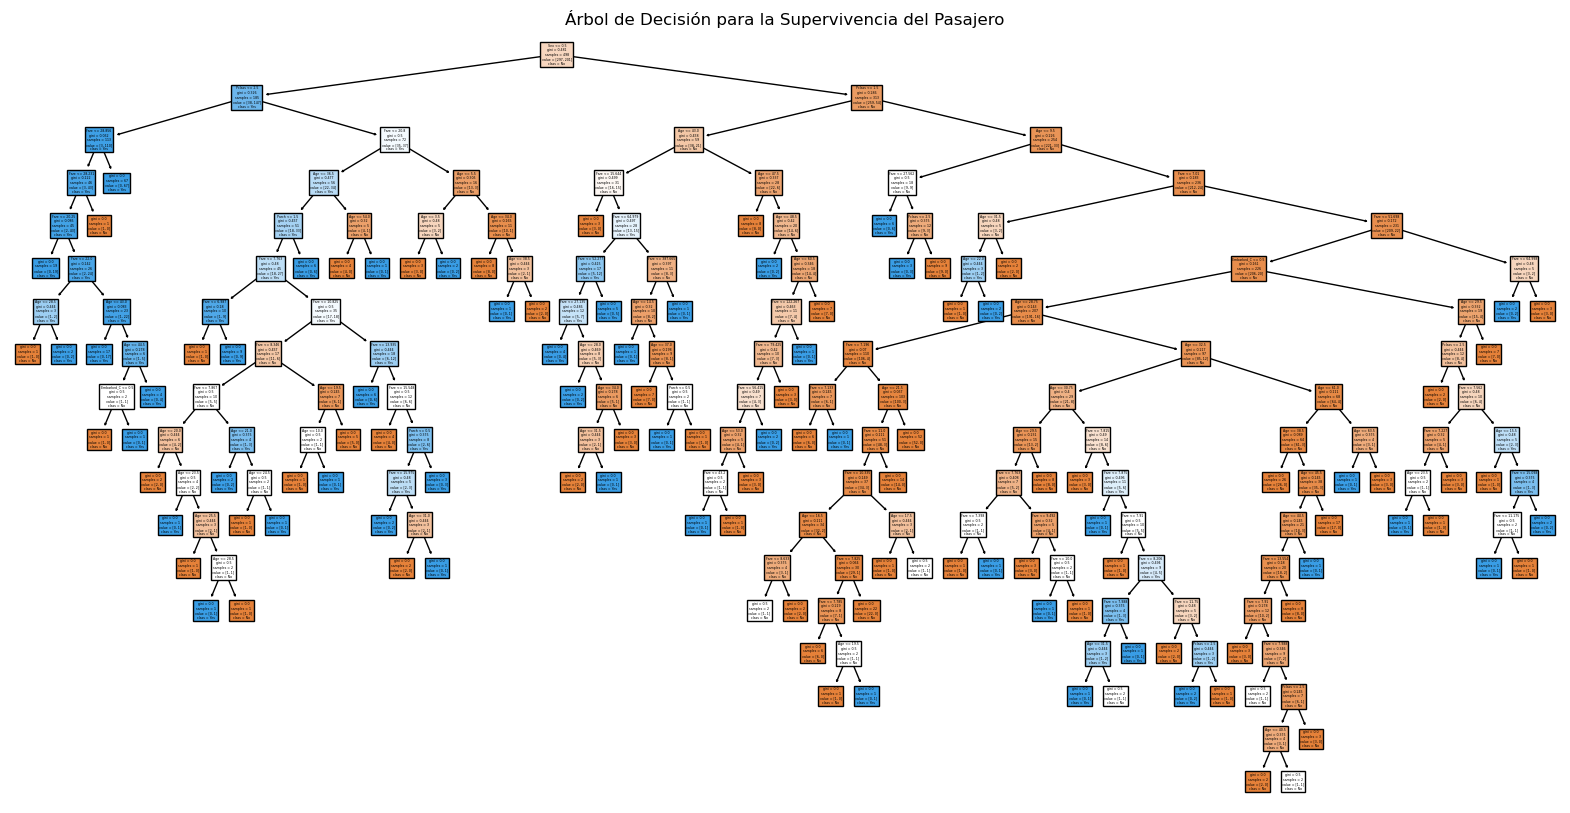

In [201]:
# Evaluar el desempeño del modelo de árbol de decisión
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("\nModelo de Árbol de Decisión:")
print(f"Precisión (Accuracy): {accuracy_tree:.2f}")
print("Matriz de Confusión:")
print(conf_matrix_tree)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title("Árbol de Decisión para la Supervivencia del Pasajero")
plt.show()







Con el modelo de Árbol de Decisión, se logró una precisión del 80%, lo cual cumple con el objetivo, considerando la complejidad de los datos (ya que la muestra contienen 424 no sobrevivientes, en disbalance con los sobrevivientes que son 288)y las variables incluidas. Este nivel de precisión sugiere que el modelo es razonablemente bueno para predecir la probabilidad de supervivencia de los pasajeros del Titanic en función de las características seleccionadas. A pesar de haber logrado el 80%, sigue cometiendo errores(como muestra a matriz de confusión).
Esto podría abordarse en futuras iteraciones optimizando aún más los hiperparámetros del modelo, probando con técnicas adicionales de preprocesamiento o utilizando otros algoritmos de clasificación más complejos.
Sin embargo, considerando el contexto y los datos disponibles, este modelo de Árbol de Decisión ofrece un balance entre precisión y simplicidad.